###  Sales Campaign analysis

__An introduction to the Facebook advertising platform__<br/>
Along with Google's search and display networks, Facebook is one of the big players when it comes to online advertising. As Facebook users interact with the platform, adding demographic information, liking particular pages and commenting on specific posts, Facebook builds a profile of that user based on who they are and what they're interested in.<br/>
This fact makes Facebook very attractive for advertisers. Advertisers can create Facebook adverts, then create an 'Audience' for that advert or group of adverts. Audiences can be built from a range of attributes including gender, age, location and interests. This specific targetting means advertisers can tailor content appropriately for a specific audience, even if the product being marketed is the same.<br/>

__What do we need from our Facebook ads analysis?__<br/>
When it comes to analysing the Facebook adverts dataset, there are a lot of questions we can ask, and a lot of insight we can generate. However, from a business perspective we want to ask questions that will give us answers we can use to improve business performance.<br/>
Without knowing anything of the company's marketing strategy or campaign objectives, we do not know which key performance indicators (KPIs) are the most important. For example, a new company may be focussed on brand awareness and may want to maximise the amount of impressions, being less concerned about how well these adverts perform in terms of generating clicks and revenue. Another company may simply want to maximise the amount of revenue, while minimising the amount it spends on advertising.<br/>
As these two objectives are very different, it is important to work with the client to understand exactly what they are hoping to achieve from their marketing campaigns before beginning any analysis in order to ensure that our conclusions are relevant and, in particular, actionable. There's not much point in producing a report full of insight, if there's nothing the client can do about it.



__Understanding the dataset__<br/>
The data used in this project is from an anonymous organisation’s social media ad campaign. The data contains 1143 observations in 11 variables. Below are the descriptions of the variables. Since you are working with numpy, refer the `Feature Index` column for the indices of every feature.

|Feature Index|Features|Description|
|----|----|----|
|0|ad_id| unique ID for each ad|
|1|xyz_campaign_id| an ID associated with each ad campaign of XYZ company|
|2|fb_campaign_id| an ID associated with how Facebook tracks each campaign|
|3|age| age of the person to whom the ad is shown|
|4|gender| gender of the person to whom the add is shown|
|5|interest| a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile)|
|6|Impressions| the number of times the ad was shown|
|7|Clicks| number of clicks on for that ad|
|8|Spent| Amount paid by company xyz to Facebook, to show that ad|
|9|Total conversion| Total number of people who enquired about the product after seeing the ad|
|10|Approved conversion| Total number of people who bought the product after seeing the ad|

Below is a snapshot of the data you will be working with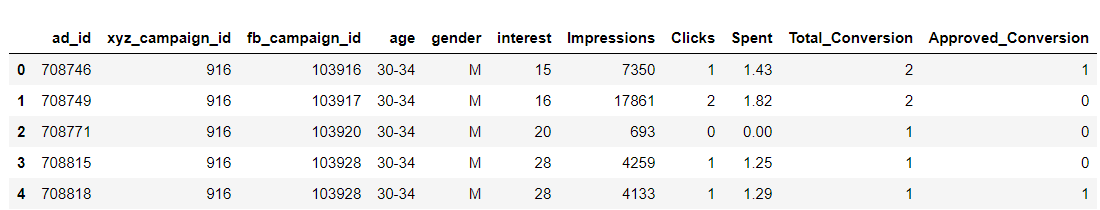

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
# Command to display all the columns of a numpy array
np.set_printoptions(threshold=sys.maxsize)

## Let's load the data

In [3]:
# Load the data
data = pd.read_csv('../data/KAG_conversion_data.csv')
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
data.shape

(1143, 11)

## Let's delve into the data to find the answers to some questions

### How many unique ad campaigns (xyz_campaign_id) does this data contain ? And for how many times was each campaign run ?

#### Total number of campaigns

In [5]:
print('Total number of unique ad campaigns: ', data['xyz_campaign_id'].nunique())
print('They are', data['xyz_campaign_id'].unique())

Total number of unique ad campaigns:  3
They are [ 916  936 1178]


#### Total times each campaign ran


In [6]:
print('The total number of times each campaign ran ', data['xyz_campaign_id'].value_counts(dropna=False).to_dict())

The total number of times each campaign ran  {1178: 625, 936: 464, 916: 54}


### What are the age groups that were targeted through these ad campaigns ?

In [7]:
# Age groups are categorized as bins. So get a unique count of the bin
print('The targeted age groups are ', data['age'].unique())

The targeted age groups are  ['30-34' '35-39' '40-44' '45-49']


### What was the average, minimum and maximum amount spent on the ads ?

In [8]:
data['Spent'].agg(['mean', 'min', 'max'])

mean     51.360656
min       0.000000
max     639.949998
Name: Spent, dtype: float64

In [9]:
avg_amt, min_amt, max_amt = data['Spent'].describe()[['mean', 'min', 'max']].round(2)

print('Average amt spent on ads was ',avg_amt)
print('Minimum amt spent on ads was ',min_amt)
print('Maximum amt spent on ads was ',max_amt)

Average amt spent on ads was  51.36
Minimum amt spent on ads was  0.0
Maximum amt spent on ads was  639.95


### What is the id of the ad having the maximum number of clicks ?

#### What were the maximum number of clicks

In [10]:
print('The maximum number of clicks were ', data['Clicks'].max())

The maximum number of clicks were  421


In [11]:
data['Clicks'].idxmax()

860

#### Which was the ad having the maximum number of clicks

In [12]:
print('The advertisement with the maximum number of clicks was the one with id:', data['ad_id'][data['Clicks'].idxmax()])

The advertisement with the maximum number of clicks was the one with id: 1121814


### How many people bought the product after seeing the ad with most clicks ? Is that the maximum number of purchases in this dataset  ?

In [13]:
# Max value of the Approved_Conversion column
data['Approved_Conversion'].max()

21

In [14]:
print('Sales of max clicks:', data['Approved_Conversion'][data['Clicks'].idxmax()])

Sales of max clicks: 13


In [15]:
if data['Approved_Conversion'][data['Clicks'].idxmax()] == data['Approved_Conversion'].max():
    print('The max sales were on this ad.')
else:
    print('The max number of purchase was ', data['Approved_Conversion'].max())

The max number of purchase was  21


### So the ad with the most clicks didn't fetch the maximum number of purchases. Let's find the details of the product having maximum number of purchases

In [16]:
print('Lets find the details of the product having maximum number of purchases: ')
data.iloc[data['Approved_Conversion'].idxmax()]

Lets find the details of the product having maximum number of purchases: 


ad_id                     1121104
xyz_campaign_id              1178
fb_campaign_id             144533
age                         30-34
gender                          M
interest                       16
Impressions               2080666
Clicks                        202
Spent                  360.150001
Total_Conversion               40
Approved_Conversion            21
Name: 528, dtype: object

## Creating additional features

Let's add some additional features that will represent some additional standard metrics.

###  Click Through Rate (CTR)
This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.

### Create a new feature `Click Through Rate`  (CTR) and then concatenate it to the original numpy array 

CTR = $\frac{Clicks}{Impressions}$x100

In [17]:
# Create a new column to calculate CTR
data['CTR'] = (data['Clicks']/data['Impressions']) * 100
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


<AxesSubplot:>

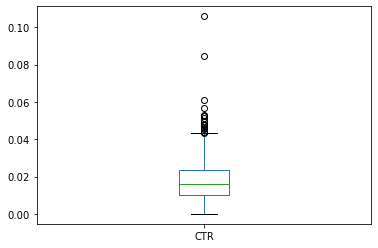

In [18]:
data['CTR'].plot.box()

***Insignts:***
 - Ads are not performing well as CTR is well below the industry benchmark.

### Create a new column that represents Cost Per Mille (CPM) .
This number is the cost of one thousand impressions. If your objective is ad exposure to increase brand awareness, this might be an important KPI for you to measure.

CPM = $\frac{Spent}{Impressions}$x1000

In [19]:
# Create a new column to calculate CPM
data['CPM'] = (data['Spent']/data['Impressions']) * 1000
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPM
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,0.194558
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.101898
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,0.293496
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,0.312122


<AxesSubplot:>

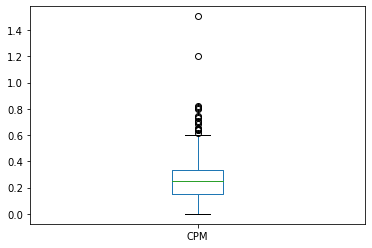

In [20]:
data['CPM'].plot.box()

### Conversion Rate

In [21]:
# Create a new column to calculate CPM
data['CR'] = (data['Total_Conversion']/data['Impressions']) * 100
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPM,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,0.194558,0.027211
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.101898,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.000000,0.144300
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,0.293496,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,0.312122,0.024195


<AxesSubplot:>

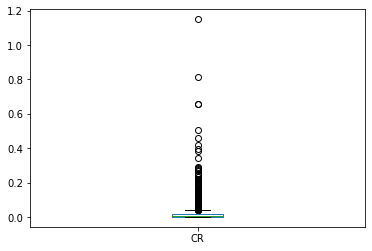

In [22]:
data['CR'].plot.box()

array([<AxesSubplot:title={'center':'CTR'}, xlabel='xyz_campaign_id'>,
       <AxesSubplot:title={'center':'CR'}, xlabel='xyz_campaign_id'>],
      dtype=object)

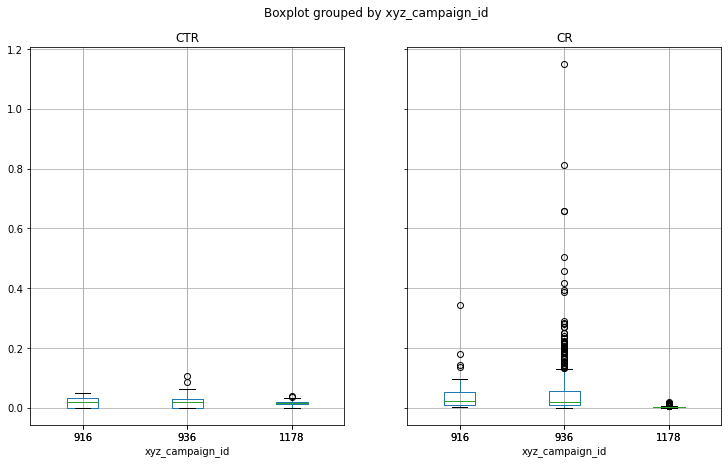

In [23]:
data.boxplot(column=['CTR', 'CR'], by='xyz_campaign_id', figsize=(12, 7))